In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(np.int)  # Iris Setosa?

per_clf = Perceptron()
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

## Implementing MLPs with Keras

In [2]:
import tensorflow as tf

In [3]:
from tensorflow import keras

In [4]:
tf.__version__

'1.14.0'

In [5]:
keras.__version__

'2.2.4-tf'

In [6]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [7]:
X_train_full.shape

(60000, 28, 28)

In [8]:
X_train_full.dtype

dtype('uint8')

In [9]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [10]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [11]:
class_names[y_train[0]]

'Coat'

In [12]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

W0713 11:50:44.582304 4622828992 deprecation.py:506] From /Users/ling/Desktop/Git/Deep-Learning/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [13]:
model

In [14]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [16]:
from tensorflow import keras
output_layer = keras.layers.Dense(10)

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.layers

In [19]:
hidden1 = model.layers[1]
hidden1.name

'dense_3'

In [21]:
model.get_layer('dense_3') is hidden1

True

In [23]:
weights, biases = hidden1.get_weights()
weights

array([[-0.06368683, -0.06023826,  0.00579847, ..., -0.0271091 ,
         0.0414222 ,  0.02580703],
       [ 0.00666054, -0.0405164 ,  0.02916791, ..., -0.03790723,
        -0.0239784 , -0.03302778],
       [-0.01255856,  0.07093698,  0.06986639, ...,  0.03685874,
         0.06890388, -0.02748631],
       ...,
       [ 0.01694223, -0.0486328 , -0.02052811, ...,  0.01873945,
         0.06543872,  0.00711918],
       [ 0.05986337,  0.03657372, -0.00516159, ...,  0.0035566 ,
        -0.02069529,  0.01130807],
       [ 0.02780375, -0.05135249, -0.0356522 , ...,  0.04958908,
         0.00082305,  0.02485554]], dtype=float32)

In [24]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [25]:
history = model.fit(X_train, y_train, epochs=30,validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 3s 49us/sample - loss: 0.7183 - acc: 0.7635 - val_loss: 0.5415 - val_acc: 0.8064
Epoch 2/30
55000/55000 [==============================] - 3s 50us/sample - loss: 0.4872 - acc: 0.8309 - val_loss: 0.4554 - val_acc: 0.8462
Epoch 3/30
55000/55000 [==============================] - 3s 48us/sample - loss: 0.4395 - acc: 0.8462 - val_loss: 0.4230 - val_acc: 0.8496
Epoch 4/30
55000/55000 [==============================] - 2s 45us/sample - loss: 0.4148 - acc: 0.8538 - val_loss: 0.3898 - val_acc: 0.8678
Epoch 5/30
55000/55000 [==============================] - 3s 46us/sample - loss: 0.3948 - acc: 0.8608 - val_loss: 0.3869 - val_acc: 0.8688
Epoch 6/30
55000/55000 [==============================] - 3s 46us/sample - loss: 0.3793 - acc: 0.8656 - val_loss: 0.3709 - val_acc: 0.8708
Epoch 7/30
55000/55000 [==============================] - 2s 45us/sample - loss: 0.3647 - acc: 0.8722 - val_loss: 0.3

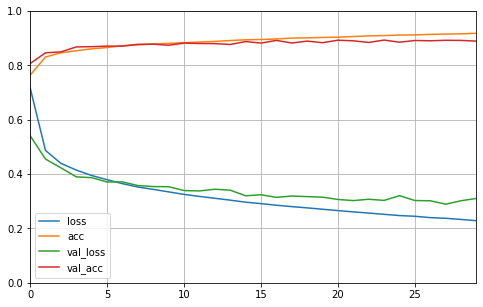

In [31]:
import pandas as pd
import matplotlib as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.pyplot.grid(True)
plt.pyplot.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.pyplot.show()

In [32]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 23us/sample - loss: 69.2324 - acc: 0.8239


[69.23238597564698, 0.8239]

In [33]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [34]:
y_pred = model.predict_classes(X_new)
y_pred
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [35]:
y_new = y_test[:3]

In [36]:
y_new

array([9, 2, 1], dtype=uint8)